In [4]:
from pathlib import Path
from datetime import datetime

import torch 
from torch.utils.data import ConcatDataset
from pytorch_lightning.trainer import Trainer
from pytorch_lightning.callbacks import EarlyStopping, ModelCheckpoint
from torchvision import transforms


# from ..medical_diffusion.data.datamodules import SimpleDataModule
# from ..medical_diffusion.data.datasets import AIROGSDataset, MSIvsMSS_2_Dataset, CheXpert_2_Dataset, SimpleDataset2D, RFMID_Dataset
# from ..medical_diffusion.models.embedders.latent_embedders import VQVAE, VQGAN, VAE, VAEGAN
from torch.cuda.amp import GradScaler, autocast

import torch.multiprocessing
torch.multiprocessing.set_sharing_strategy('file_system')
from PIL import Image
%matplotlib widget

In [24]:
image = Image.open("/projects/NEI/pranay/Eyes/medfusion/runs/2024_02_19_150506/lightning_logs/version_11880092/images/sample_75.png").convert('RGB')

In [25]:
transform = transforms.ToTensor()

    # Apply the transformation to the image
tensor = transform(image)

In [28]:
tensor.max()

tensor(1.)

In [8]:
a =tensor[:,:int(1414/2),:]

In [9]:
a.shape

torch.Size([3, 707, 2118])

In [10]:
b =tensor[:,int(1414/2):,:]

In [11]:
b.shape

torch.Size([3, 707, 2118])

In [12]:
import matplotlib.pyplot as plt


In [13]:
from torchvision.transforms.functional import to_pil_image


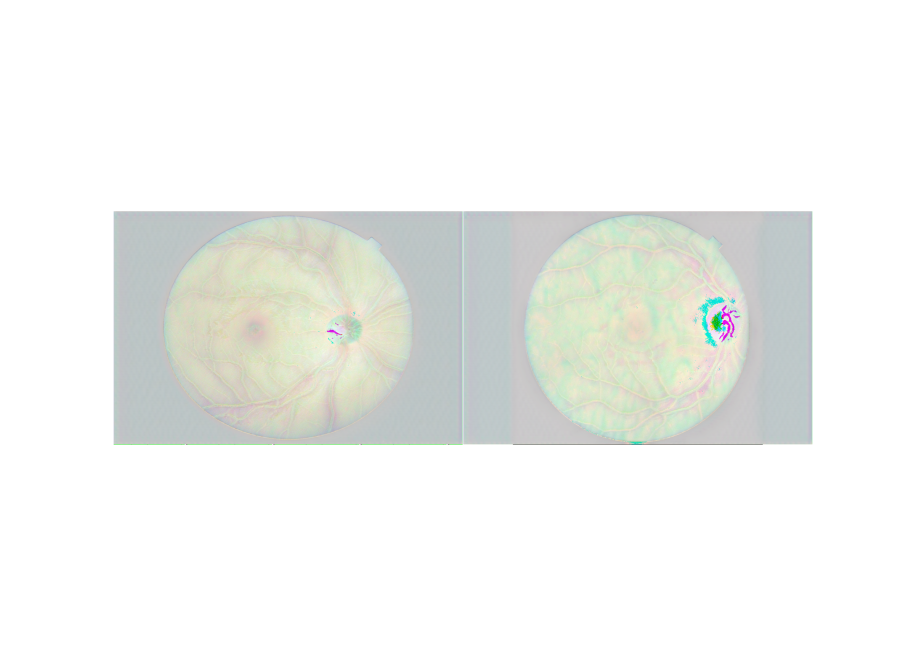

In [31]:
image = to_pil_image(a-b)

# Display the image
plt.imshow(image)
plt.axis('off')  # Turn off axis numbers
plt.show()

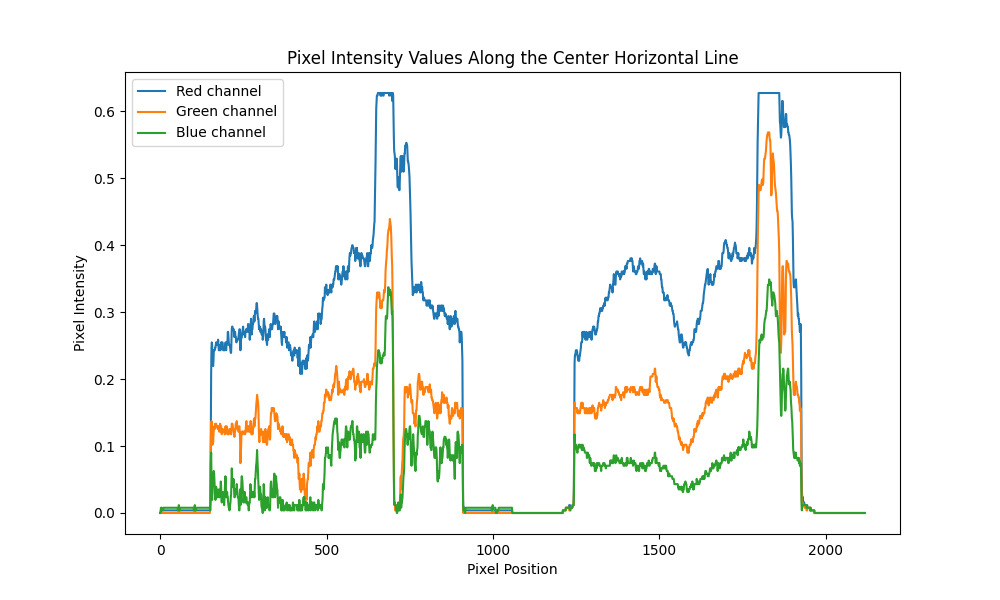

In [35]:
import numpy as np

# Assuming 'a' and 'b' are your RGB images as PyTorch tensors
# Compute the difference
diff_tensor = a - b

# Convert to PIL for easier manipulation
# from torchvision.transforms.functional import to_pil_image
# diff_image = to_pil_image(diff)



# Extract the center horizontal line
# The shape of tensor is [Channels, Height, Width]
center_line = a[:, a.shape[1] // 2, :]

# Plotting
plt.figure(figsize=(10, 6))
for i, color in enumerate(['Red', 'Green', 'Blue']):
    plt.plot(center_line[i], label=f'{color} channel')

plt.title('Pixel Intensity Values Along the Center Horizontal Line')
plt.xlabel('Pixel Position')
plt.ylabel('Pixel Intensity')
plt.legend()
plt.show()


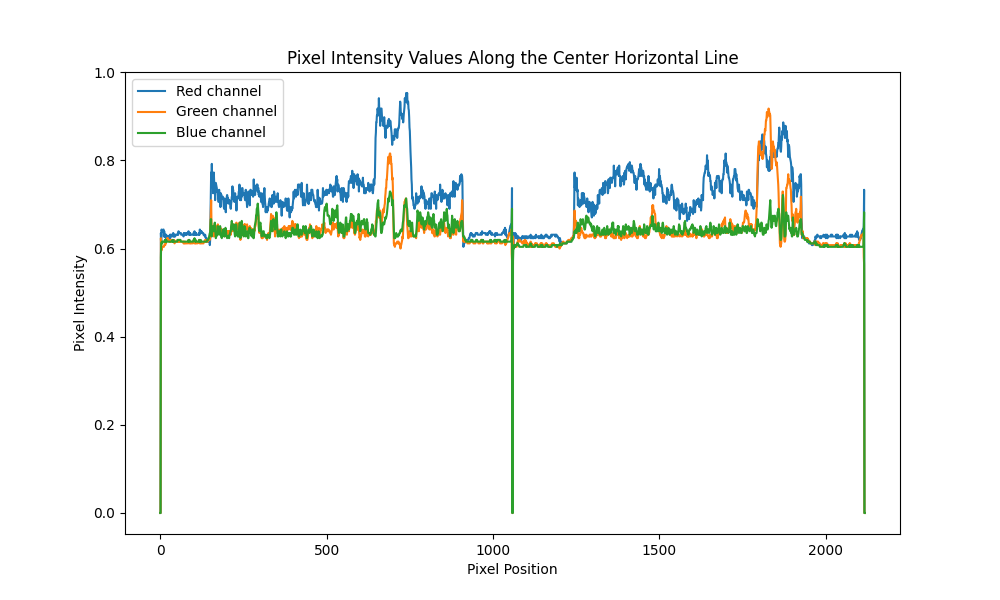

In [36]:
import numpy as np

# Assuming 'a' and 'b' are your RGB images as PyTorch tensors
# Compute the difference
diff_tensor = a - b

# Convert to PIL for easier manipulation
# from torchvision.transforms.functional import to_pil_image
# diff_image = to_pil_image(diff)



# Extract the center horizontal line
# The shape of tensor is [Channels, Height, Width]
center_line = b[:, b.shape[1] // 2, :]

# Plotting
plt.figure(figsize=(10, 6))
for i, color in enumerate(['Red', 'Green', 'Blue']):
    plt.plot(center_line[i], label=f'{color} channel')

plt.title('Pixel Intensity Values Along the Center Horizontal Line')
plt.xlabel('Pixel Position')
plt.ylabel('Pixel Intensity')
plt.legend()
plt.show()


In [1]:
import os
import numpy as np
from PIL import Image

def find_black_border(img):
    """
    Find the bounding box of the non-black area in the image.
    """
    # Convert image to numpy array
    img_array = np.array(img)

    # Create a binary mask where non-black pixels are True
    non_black_mask = np.any(img_array != [0, 0, 0], axis=-1)

    # Find non-zero rows and columns
    non_black_rows = np.any(non_black_mask, axis=1)
    non_black_cols = np.any(non_black_mask, axis=0)
    non_black_row_idx = np.where(non_black_rows)[0]
    non_black_col_idx = np.where(non_black_cols)[0]

    # Get bounding box
    if non_black_row_idx.size > 0 and non_black_col_idx.size > 0:
        return non_black_row_idx[0], non_black_row_idx[-1], non_black_col_idx[0], non_black_col_idx[-1]
    else:
        return 0, 0, 0, 0

def process_image(file_path, output_dir):
    """
    Process the image: load, find border, crop and save.
    """
    img = Image.open(file_path)
    top, bottom, left, right = find_black_border(img)
    cropped_img = img.crop((left, top, right + 1, bottom + 1))
    output_path = os.path.join(output_dir, file_path)
    os.makedirs(os.path.dirname(output_path), exist_ok=True)
    cropped_img.save(output_path)

def process_directory(input_dir, output_dir):
    """
    Recursively process each image in the directory.
    """
    for root, dirs, files in os.walk(input_dir):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif', '.tiff')):
                file_path = os.path.join(root, file)
                process_image(file_path, os.path.join(output_dir, os.path.relpath(root, input_dir)))

# Example usage
input_directory = '/projects/NEI/pranay/Eyes/Datasets/A. RFMiD_All_Classes_Dataset/1. Original Images'
output_directory = '/projects/NEI/pranay/Eyes/Datasets/A. RFMiD_All_Classes_Dataset/1. Original Images Processed'
process_directory(input_directory, output_directory)


KeyboardInterrupt: 